# Collecting and Saving Data

In [ ]:
# import snscrape.modules.twitter as sntwitter
# import pandas as pd
# from datetime import datetime, timedelta
# #'Altcoin', 'Bitcoin', 'Coindesk', 'Cryptocurrency', 'Gold', 'Appl', 'Goog', 
# stocks = ['Altcoin', 'Bitcoin', 'Coindesk', 'Cryptocurrency', 'Gold', 'Appl', 'Goog','Yhoo']
# start_date = datetime(2023, 2, 1)
# end_date = datetime(2023, 2, 7)

# for stock in stocks:
#     for i in range((end_date - start_date).days + 1):
#         date = start_date + timedelta(days=i)
#         tweets = []
#         query = f"(#{stock} OR #{stock.lower()} OR #{stock.upper()}) lang:en since:{date.strftime('%Y-%m-%d')} until:{(date + timedelta(days=1)).strftime('%Y-%m-%d')}"
#         print(type(sntwitter.TwitterSearchScraper(query).get_items()))     
#         for tweet in sntwitter.TwitterSearchScraper(query).get_items():
#             if tweet.lang == 'en':
#                 tweets.append([tweet.date, tweet.id, tweet.user.username, tweet.content])
#             if len(tweets) >= 2000:
#                 break
             
#         df = pd.DataFrame(tweets, columns=['Date', 'ID', 'username', 'tweet'])
#         df.to_csv(f"{stock}_{date.strftime('%Y-%m-%d')}.csv", index=False)


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


altCoinDfs, appleDfs, bitCoinDfs, coinDeskDfs, cryptoDfs, goldDfs, googleDfs, yahooDfs = [[] for _ in range(8)]
for i in range(1,8):
    altCoinDfs.append(pd.read_csv(f"Altcoin2023-02-0{i}.csv"))
    appleDfs.append(pd.read_csv(f"Appl2023-02-0{i}.csv"))
    bitCoinDfs.append(pd.read_csv(f"Bitcoin2023-02-0{i}.csv"))
    coinDeskDfs.append(pd.read_csv(f"Coindesk2023-02-0{i}.csv"))
    cryptoDfs.append(pd.read_csv(f"Cryptocurrency2023-02-0{i}.csv"))
    goldDfs.append(pd.read_csv(f"Gold2023-02-0{i}.csv"))
    googleDfs.append(pd.read_csv(f"Goog2023-02-0{i}.csv"))
    yahooDfs.append(pd.read_csv(f"Yhoo2023-02-0{i}.csv"))
altCoinMerged_df = pd.concat(altCoinDfs, ignore_index=True)
appleMerged_df = pd.concat(appleDfs, ignore_index=True)
bitCoinMerged_df = pd.concat(bitCoinDfs, ignore_index=True)
coinDeskMerged_df = pd.concat(coinDeskDfs, ignore_index=True)
cryptoMerged_df = pd.concat(cryptoDfs, ignore_index=True)
goldMerged_df = pd.concat(goldDfs, ignore_index=True)
googleMerged_df = pd.concat(googleDfs, ignore_index=True)
yahooMerged_df = pd.concat(yahooDfs, ignore_index=True)

print("AltCoin Shape :",altCoinMerged_df.shape)
print("Apple Shape :",appleMerged_df.shape)
print("Bitcoin Shape :",bitCoinMerged_df.shape)
print("CoinDesk Shape :",coinDeskMerged_df.shape)
print("Crypto Shape :",cryptoMerged_df.shape)
print("Gold Shape :",goldMerged_df.shape)
print("Google Shape :",googleMerged_df.shape)
print("Yahoo Shape :",yahooMerged_df.shape)

AltCoin Shape : (13986, 4)
Apple Shape : (61, 4)
Bitcoin Shape : (14000, 4)
CoinDesk Shape : (147, 4)
Crypto Shape : (14000, 4)
Gold Shape : (12425, 4)
Google Shape : (206, 4)
Yahoo Shape : (0, 4)


In [35]:
# Clubing all dataframes together

df_list=[altCoinMerged_df,appleMerged_df,bitCoinMerged_df,coinDeskMerged_df,cryptoMerged_df,goldMerged_df,googleMerged_df,yahooMerged_df]
df_list_name=["Altcoin_df","Apple_df","Bitcoin_df","Coindesk_df","Crypto_df","Gold_df","Goog_df","Yhoo_df"]
index=0
for dataframes in df_list:
    dataframes["tag"]=df_list_name[index]
    index+=1
merged_df = pd.concat(df_list)
merged_df.to_csv("merged.csv")

In [36]:
merged_df.head()

,Date,ID,username,tweet,tag
0,2023-02-01 23:59:04+00:00,1620934790836019200,BNB_Tracker,#BinanceCoin price update: $BNB\n\n#BNB $317.1...,Altcoin_df
1,2023-02-01 23:59:04+00:00,1620934790584352768,ruhul180,The treasury will also be used to fund new Red...,Altcoin_df
2,2023-02-01 23:59:00+00:00,1620934773438042114,BigEyesCoin,🙀ONLY 48 HOURS LEFT TO CLAIM YOUR 200% BONUS O...,Altcoin_df
3,2023-02-01 23:57:02+00:00,1620934281009987584,BNB_Tracker,#BinanceCoin price update: $BNB\n\n#BNB $317.0...,Altcoin_df
4,2023-02-01 23:55:35+00:00,1620933913680945152,cryptoalerted,IAGON (IAG) went up 17.7 percent in the last 1...,Altcoin_df


In [37]:
merged_df.tag.unique()

array(['Altcoin_df', 'Apple_df', 'Bitcoin_df', 'Coindesk_df', 'Crypto_df',
       'Gold_df', 'Goog_df'], dtype=object)

In [38]:
merged_df.shape

(54825, 5)

In [39]:
# convert review_date to datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# extract year, month, and day
merged_df['year'] = merged_df['Date'].dt.year
merged_df['month'] = merged_df['Date'].dt.month
merged_df['day'] = merged_df['Date'].dt.day

# Dropping Date Column
merged_df.drop(columns=["Date"],inplace=True)

merged_df.head()

,ID,username,tweet,tag,year,month,day
0,1620934790836019200,BNB_Tracker,#BinanceCoin price update: $BNB\n\n#BNB $317.1...,Altcoin_df,2023,2,1
1,1620934790584352768,ruhul180,The treasury will also be used to fund new Red...,Altcoin_df,2023,2,1
2,1620934773438042114,BigEyesCoin,🙀ONLY 48 HOURS LEFT TO CLAIM YOUR 200% BONUS O...,Altcoin_df,2023,2,1
3,1620934281009987584,BNB_Tracker,#BinanceCoin price update: $BNB\n\n#BNB $317.0...,Altcoin_df,2023,2,1
4,1620933913680945152,cryptoalerted,IAGON (IAG) went up 17.7 percent in the last 1...,Altcoin_df,2023,2,1


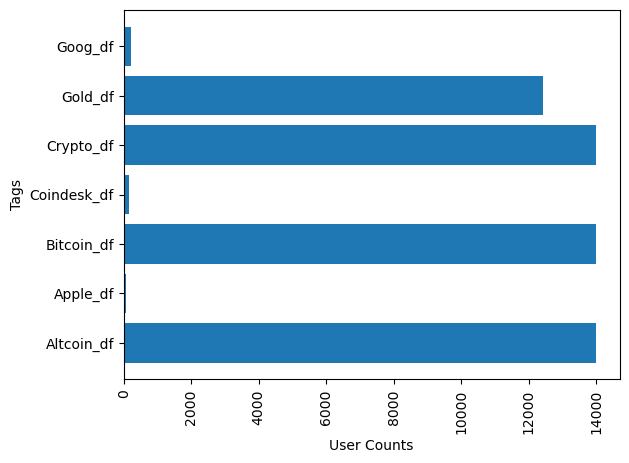

In [40]:
# Analyzing how many users have tweeted in each tag

grouped_data = merged_df.groupby('tag')['username'].count()

plt.barh(grouped_data.index, grouped_data.values)
plt.xticks(rotation=90)
plt.xlabel('User Counts')
plt.ylabel('Tags')
plt.show()


In [41]:
# Analyzing which users have tweeted the max and min number of times

temp = merged_df['username'].value_counts()
max_user = temp.idxmax()
min_user = temp.idxmin()
print("User with Max Tweets :",max_user)
print("User with Min Tweets :",min_user)

User with Max Tweets : BNB_Tracker
User with Min Tweets : Renegade_Rum


BNB_Tracker tweet Count : 4737
Renegade_Rum Count : 1


Text(0.5, 1.0, 'Bar Graph of User Counts')

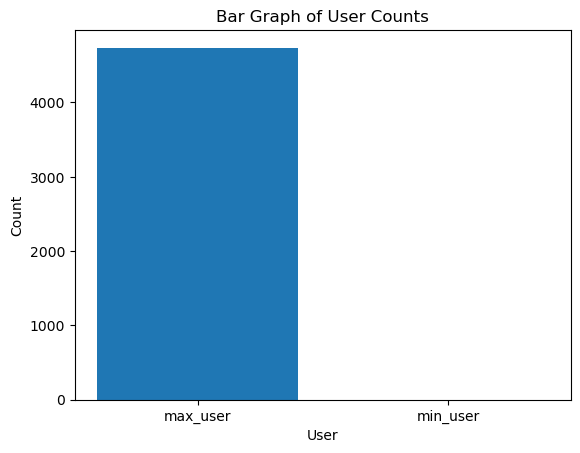

In [42]:
# Analyzing how many tweets have been posted by max and min user

max_user_count = temp.loc[max_user]
min_user_count=temp.loc[min_user]

print(f"{max_user} tweet Count :",max_user_count)
print(f"{min_user} Count :",min_user_count)

x = ['max_user', 'min_user']
y = [max_user_count, min_user_count]

# create bar plot
plt.bar(x, y)
plt.xlabel('User')
plt.ylabel('Count')
plt.title('Bar Graph of User Counts')

# show plot

C:\Users\Gurdaan Walia\AppData\Local\Temp\ipykernel_11816\1930017840.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data['day'] = user_data['day'].replace(day_map)


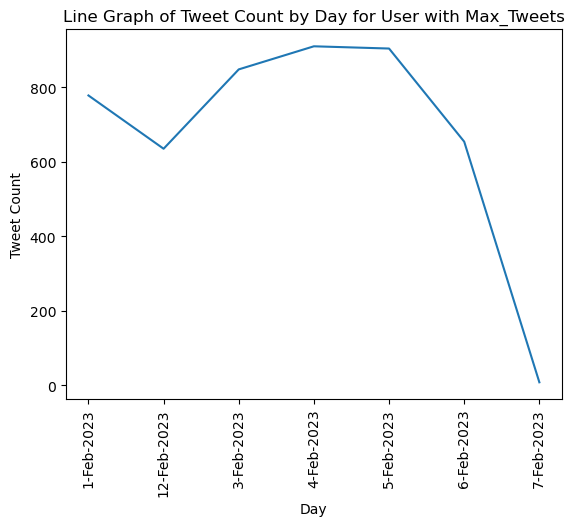

In [43]:
# Analyzing tweets posted each day by the user posted max times

# group data by username and day
grouped_data = merged_df.groupby(['username', 'day'])['day'].count()

# convert grouped data to DataFrame
grouped_df = grouped_data.reset_index(name='tweet_count')

# filter data for a particular user
user_data = grouped_df[grouped_df['username'] == max_user]

# create a dictionary to map integer values to dates
day_map = {1: '1-Feb-2023', 2: '12-Feb-2023', 3: '3-Feb-2023', 4: '4-Feb-2023', 5: '5-Feb-2023', 6: '6-Feb-2023', 7: '7-Feb-2023'}

# replace values in day column
user_data['day'] = user_data['day'].replace(day_map)

plt.plot(user_data['day'], user_data['tweet_count'])
plt.xlabel('Day')
plt.ylabel('Tweet Count')
plt.title('Line Graph of Tweet Count by Day for User with Max_Tweets')

# rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# show plot
plt.show()

In [44]:
merged_df.head(1)

,ID,username,tweet,tag,year,month,day
0,1620934790836019200,BNB_Tracker,#BinanceCoin price update: $BNB\n\n#BNB $317.1...,Altcoin_df,2023,2,1


In [45]:
# group data by tag and username
grouped_data = merged_df.groupby(['tag', 'username'])['username'].count()

# convert grouped data to DataFrame
grouped_df = grouped_data.reset_index(name='count')

# create pivot table
pivot_df = grouped_df.pivot(index='tag', columns='username', values='count')

pivot_df.head(10)

username,007radiotv,07caVv,0FajarPurnama0,0I_shubham12,0ZeroAuthority,0mickmack0,0nly1trace,0privacy1,0ti5Driftw00d,0wnerzzz,...,zolnay_Ms,zorro_arslan,zpattern,ztikzjj63,zuam65520318,zuee96856171,zulm48386504,zycrypto,zzaries2299,zzz_hamed
tag,,,,,,,,,,,,,,,,,,,,,
Altcoin_df,NaN,10.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Apple_df,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bitcoin_df,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,...,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,2.0
Coindesk_df,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crypto_df,7.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN
Gold_df,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Goog_df,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# filter data for a particular tag
altcoin_tag_data = grouped_df[grouped_df['tag'] == 'Altcoin_df']
apple_tag_data = grouped_df[grouped_df['tag'] == 'Apple_df']
bitcoin_tag_data = grouped_df[grouped_df['tag'] == 'Bitcoin_df']
coindesk_tag_data = grouped_df[grouped_df['tag'] == 'Coindesk_df']
crypto_tag_data = grouped_df[grouped_df['tag'] == 'Crypto_df']
gold_tag_data = grouped_df[grouped_df['tag'] == 'Gold_df']
google_tag_data = grouped_df[grouped_df['tag'] == 'Goog_df']

# find user with max tweets
max_user_altcoin = altcoin_tag_data.loc[altcoin_tag_data['count'].idxmax()]['username']
max_user_altcoin_count = altcoin_tag_data.loc[altcoin_tag_data['count'].idxmax()]['count']

max_user_apple = apple_tag_data.loc[apple_tag_data['count'].idxmax()]['username']
max_user_apple_count = apple_tag_data.loc[apple_tag_data['count'].idxmax()]['count']

max_user_bitcoin = bitcoin_tag_data.loc[bitcoin_tag_data['count'].idxmax()]['username']
max_user_bitcoin_count = bitcoin_tag_data.loc[bitcoin_tag_data['count'].idxmax()]['count']

max_user_coindesk = coindesk_tag_data.loc[coindesk_tag_data['count'].idxmax()]['username']
max_user_coindesk_count = coindesk_tag_data.loc[coindesk_tag_data['count'].idxmax()]['count']

max_user_crypto = crypto_tag_data.loc[crypto_tag_data['count'].idxmax()]['username']
max_user_crypto_count = crypto_tag_data.loc[crypto_tag_data['count'].idxmax()]['count']

max_user_gold = gold_tag_data.loc[gold_tag_data['count'].idxmax()]['username']
max_user_gold_count = gold_tag_data.loc[gold_tag_data['count'].idxmax()]['count']

max_user_google = google_tag_data.loc[google_tag_data['count'].idxmax()]['username']
max_user_google_count = google_tag_data.loc[google_tag_data['count'].idxmax()]['count']

print("User with max tweets in Altcoin :",max_user_altcoin)
print("Tweets count :",max_user_altcoin_count)
print("User with max tweets in Apple :",max_user_apple)
print("Tweets count :",max_user_apple_count)
print("User with max tweets in Bitcoin :",max_user_bitcoin)
print("Tweets count :",max_user_bitcoin_count)
print("User with max tweets in Coindesk :",max_user_coindesk)
print("Tweets count :",max_user_coindesk_count)
print("User with max tweets in Crypto :",max_user_crypto)
print("Tweets count :",max_user_crypto_count)
print("User with max tweets in Gold :",max_user_gold)
print("Tweets count :",max_user_gold_count)
print("User with max tweets in Google :",max_user_google)
print("Tweets count :",max_user_google_count)

User with max tweets in Altcoin : BNB_Tracker
Tweets count : 3058
User with max tweets in Apple : CryptoTreeMap
Tweets count : 6
User with max tweets in Bitcoin : BNB_Tracker
Tweets count : 476
User with max tweets in Coindesk : BTCticker
Tweets count : 84
User with max tweets in Crypto : BNB_Tracker
Tweets count : 1203
User with max tweets in Gold : PopescuCo
Tweets count : 748
User with max tweets in Google : leoventuresllc
Tweets count : 48


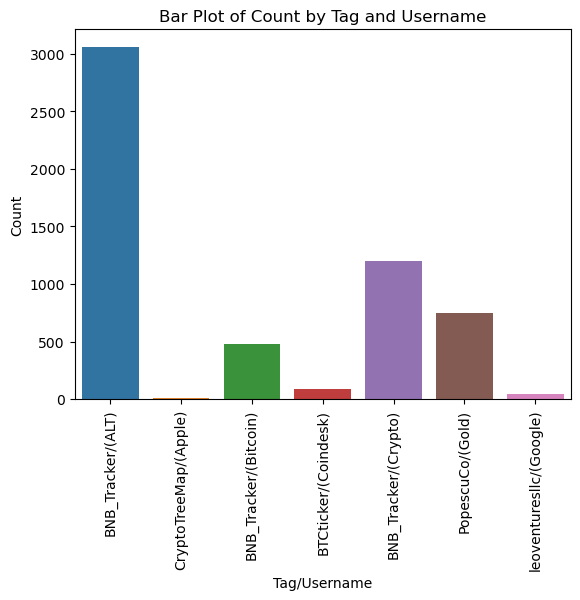

In [47]:
# create x and y data

x=['BNB_Tracker/(ALT)','CryptoTreeMap/(Apple)','BNB_Tracker/(Bitcoin)','BTCticker/(Coindesk)','BNB_Tracker/(Crypto)','PopescuCo/(Gold)','leoventuresllc/(Google)']
y=[max_user_altcoin_count,max_user_apple_count,max_user_bitcoin_count,max_user_coindesk_count,max_user_crypto_count,max_user_gold_count,max_user_google_count]
# create bar plot
sns.barplot(x=x, y=y)
plt.xlabel('Tag/Username')
plt.ylabel('Count')
plt.title('Bar Plot of Count by Tag and Username')

# rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# show plot
plt.show()

In [48]:
merged_df.head(1)

,ID,username,tweet,tag,year,month,day
0,1620934790836019200,BNB_Tracker,#BinanceCoin price update: $BNB\n\n#BNB $317.1...,Altcoin_df,2023,2,1


Text(0, 0.5, 'Number of Tweets')

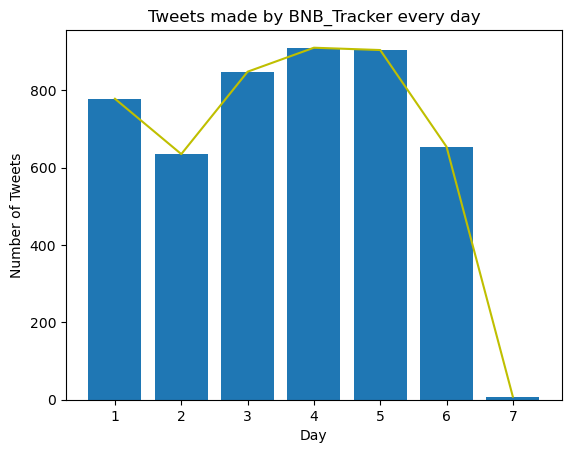

In [55]:
updatedmerged_df=merged_df[merged_df['username']=='BNB_Tracker'].groupby('day').count()
updatedmerged_df.reset_index(inplace=True)

plt.bar(updatedmerged_df['day'],updatedmerged_df['username'])
plt.plot(updatedmerged_df['day'], updatedmerged_df['username'],color='y')
plt.title('Tweets made by BNB_Tracker every day')
plt.xlabel('Day')
plt.ylabel('Number of Tweets')

# As we can see the number of tweets for this user every day is more than 500. So we believe that 
# this could be due to the bot

In [99]:
import regex as re
import string
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
import emoji

eng_stop_words = list(stopwords.words('english'))

def remove_emoji(text):
    text = emoji.demojize(text)
    text = re.sub(':[a-z_]+:', '', text)
    return text

def ProcessedTweets(text):
    
    #changing tweet text to small letters
    text = text.lower()
    
    # Removing @ and links 
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", text).split())
    
    # removing repeating characters
    text = re.sub(r'\@\w+|\#\w+|\d+', '', text)
    
    # removing punctuation and numbers
    punct = str.maketrans('', '', string.punctuation+string.digits)
    text = text.translate(punct)
    
    # tokenizing words and removing stop words from the tweet text
    tokens = word_tokenize(text)  
    filtered_words = [w for w in tokens if w not in eng_stop_words]
    
    # removing emoji codes from the tweet text
    filtered_words = [remove_emoji(w) for w in filtered_words]
    
    # removing words with length less than 2
    filtered_words=[w for w in filtered_words if len(w)>2]
    
    # lemmetizing words
    lemmatizer = WordNetLemmatizer() 
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    text = " ".join(lemma_words)
    return text


In [100]:
merged_df['Processed_Tweets'] = merged_df['tweet'].apply(ProcessedTweets)
merged_df.head()

,ID,username,tweet,tag,year,month,day,Processed_Tweets
0,1620934790836019200,BNB_Tracker,#BinanceCoin price update: $BNB\n\n#BNB $317.1...,Altcoin_df,2023,2,1,price update bnb usd btc eth follow recent bnb...
1,1620934790584352768,ruhul180,The treasury will also be used to fund new Red...,Altcoin_df,2023,2,1,treasury also used fund new red falcon product...
2,1620934773438042114,BigEyesCoin,🙀ONLY 48 HOURS LEFT TO CLAIM YOUR 200% BONUS O...,Altcoin_df,2023,2,1,only hour left claim bonus big puuurchase code...
3,1620934281009987584,BNB_Tracker,#BinanceCoin price update: $BNB\n\n#BNB $317.0...,Altcoin_df,2023,2,1,price update bnb usd btc eth follow recent bnb...
4,1620933913680945152,cryptoalerted,IAGON (IAG) went up 17.7 percent in the last 1...,Altcoin_df,2023,2,1,iagon iag went percent last minute


In [101]:
# Function for polarity score
def polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Function to get sentiment type
#setting the conditions
def sentimenttextblob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"  

In [102]:
# using the functions to get the polarity and sentiment
import textblob
from textblob import TextBlob

merged_df['Polarity'] = merged_df['Processed_Tweets'].apply(polarity)
merged_df['Sentiment'] = merged_df['Polarity'].apply(sentimenttextblob)
sent = merged_df['Sentiment'].value_counts()
sent

Neutral     28069
Positive    21382
Negative     5374
Name: Sentiment, dtype: int64

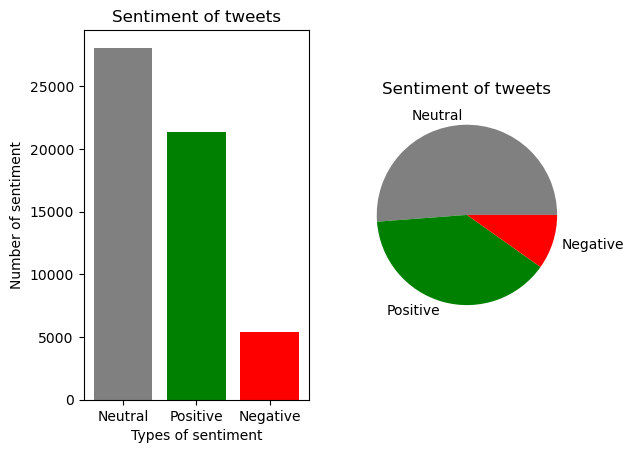

In [128]:
# create subplots
fig, ax = plt.subplots(1, 2)

# plot bar chart
ax[0].bar(['Neutral', 'Positive', 'Negative'], sent, color=['grey', 'green', 'red'])
ax[0].set_title('Sentiment of tweets')
ax[0].set_xlabel('Types of sentiment')
ax[0].set_ylabel('Number of sentiment')

# plot pie chart
ax[1].pie(sent, labels=['Neutral', 'Positive', 'Negative'], colors=['grey', 'green', 'red'])
ax[1].set_title('Sentiment of tweets')

plt.show()

In [105]:
merged_df.head(2)

,ID,username,tweet,tag,year,month,day,Processed_Tweets,Polarity,Sentiment
0,1620934790836019200,BNB_Tracker,#BinanceCoin price update: $BNB\n\n#BNB $317.1...,Altcoin_df,2023,2,1,price update bnb usd btc eth follow recent bnb...,0.000000,Neutral
1,1620934790584352768,ruhul180,The treasury will also be used to fund new Red...,Altcoin_df,2023,2,1,treasury also used fund new red falcon product...,0.068182,Positive


In [117]:
temp=merged_df.groupby(['username','Sentiment'])['Sentiment'].count()
# convert grouped data to DataFrame
grouped_df = temp.reset_index(name='count')
grouped_df.head(2)

merged_df=merged_df[(merged_df['username']=='BNB_Tracker') | (merged_df['username']=='CryptoTreeMap') | (merged_df['username']=='BNB_Tracker') | (merged_df['username']=='BTCticker') | (merged_df['username']=='BNB_Tracker') | (merged_df['username']=='PopescuCo') | (merged_df['username']=='leoventuresllc') ]
temp=merged_df.groupby(['username','Sentiment'])['Sentiment'].count()

# convert grouped data to DataFrame
grouped_df = temp.reset_index(name='count')

# create pivot table
pivot_df = grouped_df.pivot(index='username', columns='Sentiment', values='count')

pivot_df.head(10)

Sentiment,Negative,Neutral,Positive
username,,,
BNB_Tracker,NaN,4737.0,NaN
BTCticker,NaN,NaN,105.0
CryptoTreeMap,NaN,12.0,NaN
PopescuCo,77.0,490.0,181.0
leoventuresllc,NaN,50.0,NaN


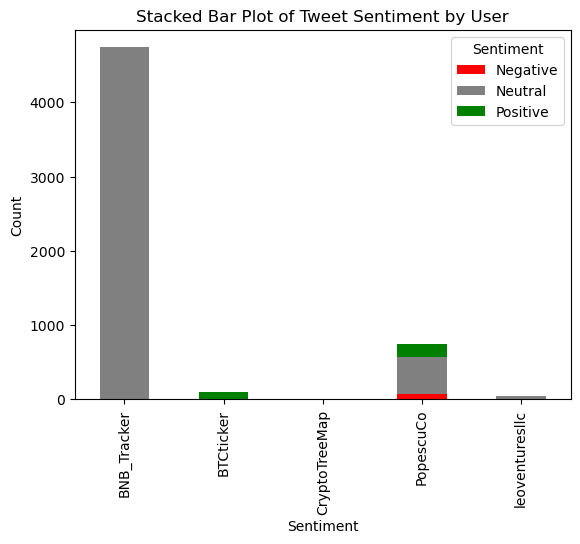

In [122]:
# create stacked bar plot
pivot_df.plot(kind='bar',color=['red','grey','green'], stacked=True)

# add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Tweet Sentiment by User')

# show plot
plt.show()

In [115]:
tweets_string = merged_df['Processed_Tweets'].tolist()
tweets_string = " ".join(tweets_string)


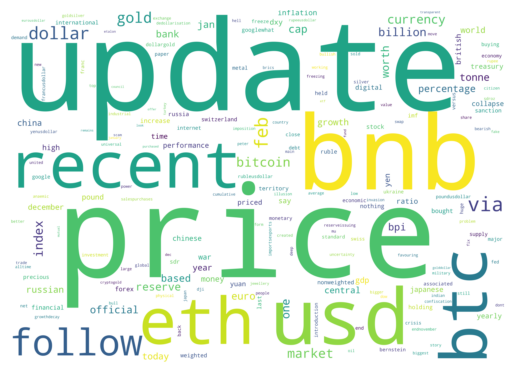

In [116]:
# Displaying the most talked about word in a word cloud 
# some stop words were still evident but was removed during visualization on Power BI
# Instantiate the Twitter word cloud object

from wordcloud import WordCloud, STOPWORDS

w_cloud = WordCloud(collocations = False,max_words=200, background_color = 'white', width = 7000, height = 5000).generate(tweets_string)

# Display the generated Word Cloud
plt.imshow(w_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()